In [19]:
import pickle
import pandas as pd
import numpy as np

In [20]:
from sklearn.externals import joblib
from sklearn.metrics import *
from sklearn.preprocessing import *
from numpy import random
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from __future__ import print_function
import matplotlib.cm as cm
%matplotlib inline

In [21]:
save_load_path = '/Users/YuchenZhou/Dropbox (Personal)/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
np_biPCA = np.load(save_load_path+'/pc_scores_binary.npy')
np_biPCA
np_biPCA_scaled = scale(np_biPCA)# standardize data
df_biPCA = pd.DataFrame(np_biPCA)
df_biPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
0,-0.533673,-0.039567,-0.055909,-0.135563,-0.034110,0.149096,-0.109594,-0.084287,0.081368,0.335902,...,0.095798,0.065244,0.145046,-0.076255,0.157528,-0.008603,-0.099140,0.149253,0.104603,-0.046012
1,-0.317000,-0.019973,-0.038854,-0.002101,-0.029063,0.060313,0.035016,-0.101727,-0.047917,0.156251,...,0.242232,-0.019754,0.010641,0.063953,0.130235,-0.000136,-0.133980,0.174361,-0.032552,-0.075677
2,-0.502023,-0.007212,-0.058213,-0.440710,0.011910,0.152978,0.118296,-0.277373,-0.034969,0.104811,...,-0.230822,-0.115509,0.125489,-0.319345,-0.136272,0.274272,0.140853,-0.071844,-0.016077,-0.037905
3,-0.853198,-0.010085,-0.055012,-0.138997,-0.203128,0.283869,0.119620,-0.050645,0.022963,0.324089,...,0.240204,-0.145839,-0.223222,-0.403792,-0.080735,0.146737,0.232190,0.011731,0.100320,-0.133662
4,-0.788858,-0.029654,-0.038454,0.205846,-0.052479,0.152369,-0.035396,-0.099121,-0.025894,0.236372,...,0.068994,-0.165052,0.144949,-0.083723,-0.144770,-0.446778,-0.109002,0.134334,-0.262058,-0.057278


Run cluster analysis, with the number of cluster ranging from 2 to 30

In [22]:
k_range=range(2,30)

k_means_var=[KMeans(n_clusters=k, random_state=10).fit(df_biPCA) for k in k_range]
centroids=[X.cluster_centers_ for X in k_means_var]

Calculate Euclidean distance, WCSS, TSS and BSS.

- WCSS(within cluster sum of squares): the total distance of data points from their respective cluster centroids

- AWSS(average within cluster sum of squares): the average distance of data points from their respective cluster centroids

- BSS(between cluster sum of squares): total distance of various cluster centroids to the global mean of data

- TSS(total sum of squares): total distance of data points from global mean of data, for a given dataset tss is going to be constant

-  Rsq, i.e. BSS/TSS, is the total variance explained by clustering

we expect WCSS to be lower and BSS to be higher, thus we should select the iteration with maximum BSS/TSS

In [23]:
# calculate pairwise distances between clusters
D_k = [cdist(df_biPCA, cent, 'euclidean') for cent in centroids]

# returns the smallest euclidean distance between clusters
dist = [np.min(D,axis=1) for D in D_k]

AWSS = [sum(d)/df_biPCA.shape[0] for d in dist]
WCSS = [sum(d**2) for d in dist]
TSS = sum(pdist(df_biPCA)**2)/df_biPCA.shape[0]
BSS = TSS-WCSS
Rsq = BSS/TSS

## Elbow curve

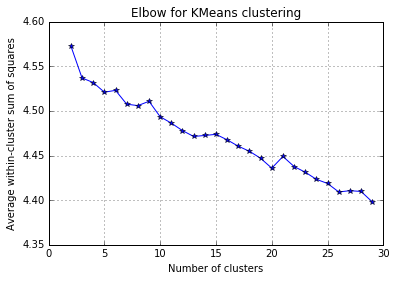

In [24]:
fig = plt.figure() #create a figure contain all the plots
ax = fig.add_subplot(111)
ax.plot(k_range, AWSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

## Variance Explained vs K

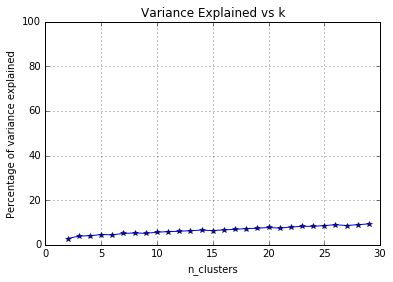

In [25]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, Rsq*100, 'b*-') 
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs k')

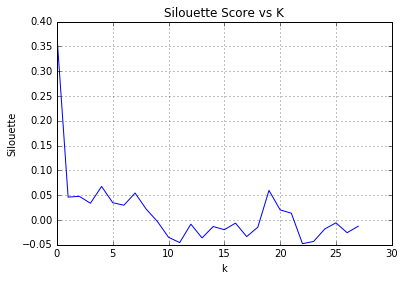

In [26]:
s=[silhouette_score(df_biPCA, X.labels_, metric = 'euclidean', random_state=10) for X in k_means_var]   
plt.plot(s)
plt.grid(True)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette Score vs K")

In [27]:
output_path = '/Users/YuchenZhou/Dropbox (Personal)/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles/Clustering/Data output/'
#choose the number of clusters, 10
num_clusters = 10

km = KMeans(n_clusters=num_clusters, random_state=10)

%time km.fit(df_biPCA)

#dump the cluster into pickle file and load
joblib.dump(km, output_path+'cluster_lyrics_biPCA.pkl')

km = joblib.load(output_path + 'cluster_lyrics_biPCA.pkl')

predict = km.fit_predict(np_biPCA)

CPU times: user 2.54 s, sys: 95.9 ms, total: 2.63 s
Wall time: 695 ms


In [28]:
#add cluster index as 'cluster' column to the dataframe
df_biPCA['cluster']= predict

In [29]:
df_biPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,726,727,728,729,730,731,732,733,734,cluster
0,-0.533673,-0.039567,-0.055909,-0.135563,-0.034110,0.149096,-0.109594,-0.084287,0.081368,0.335902,...,0.065244,0.145046,-0.076255,0.157528,-0.008603,-0.099140,0.149253,0.104603,-0.046012,7
1,-0.317000,-0.019973,-0.038854,-0.002101,-0.029063,0.060313,0.035016,-0.101727,-0.047917,0.156251,...,-0.019754,0.010641,0.063953,0.130235,-0.000136,-0.133980,0.174361,-0.032552,-0.075677,5
2,-0.502023,-0.007212,-0.058213,-0.440710,0.011910,0.152978,0.118296,-0.277373,-0.034969,0.104811,...,-0.115509,0.125489,-0.319345,-0.136272,0.274272,0.140853,-0.071844,-0.016077,-0.037905,5
3,-0.853198,-0.010085,-0.055012,-0.138997,-0.203128,0.283869,0.119620,-0.050645,0.022963,0.324089,...,-0.145839,-0.223222,-0.403792,-0.080735,0.146737,0.232190,0.011731,0.100320,-0.133662,0
4,-0.788858,-0.029654,-0.038454,0.205846,-0.052479,0.152369,-0.035396,-0.099121,-0.025894,0.236372,...,-0.165052,0.144949,-0.083723,-0.144770,-0.446778,-0.109002,0.134334,-0.262058,-0.057278,7


In [30]:
#group by cluster index and compute the mean for each cluster on each column
df_grouped = df_biPCA.groupby(df_biPCA['cluster'])
df_grouped.mean()

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.831893,-0.021434,-0.051131,-0.150422,-0.160937,0.245548,-0.023880,-0.221586,-0.053236,0.306927,...,0.007267,-0.081570,0.036278,0.029845,-0.001662,-0.000104,-0.026329,-0.022017,-0.001499,-0.006014
1,-0.649976,-0.022441,-0.061679,-0.765333,-0.211342,0.300893,-0.098073,-0.446868,-0.127129,0.161296,...,0.010832,-0.039737,0.032457,-0.000440,0.016677,-0.016960,-0.020272,-0.015705,0.008029,-0.052856
2,-3.590573,0.015887,-0.133182,-0.429832,-0.988260,0.817382,-0.022103,-0.825608,-0.456779,0.351212,...,0.094913,0.044258,0.045614,-0.106725,-0.103713,0.053658,0.258324,0.011273,0.099683,-0.077088
3,-4.174451,0.071309,-0.051271,0.213394,-0.431483,0.381430,-0.043244,-0.341387,-0.084933,0.353283,...,0.003165,-0.082577,0.014636,0.016635,-0.018595,-0.006093,-0.021211,-0.071438,0.008407,-0.016131
4,-2.823855,0.047431,-0.037703,0.224857,-0.167124,0.486015,0.066874,-0.147295,-0.086237,0.533609,...,0.024829,-0.070787,0.040161,0.026535,-0.023868,-0.037766,-0.021504,-0.035169,0.007563,-0.000461
5,-0.451467,-0.006985,-0.025486,-0.095780,-0.080553,0.127221,-0.012017,-0.121504,-0.008614,0.147101,...,0.001039,-0.032094,0.023456,-0.015973,-0.004988,-0.014546,-0.020879,-0.021377,0.008115,-0.002506
6,-4.362162,0.010212,-0.140389,-0.823332,-0.937947,1.015514,-0.328657,-0.780940,0.199547,1.209584,...,0.038815,-0.220914,0.184124,0.185861,-0.057583,-0.229374,0.036984,-0.079055,-0.042535,-0.077440
7,-0.919169,-0.032491,-0.072766,-0.074385,-0.180001,0.247054,-0.018279,-0.223278,0.002455,0.346505,...,0.002335,-0.081962,0.074943,-0.003005,0.002246,-0.036986,-0.015076,-0.036927,0.003505,-0.013283
8,-1.904743,0.045256,-0.011088,0.534475,-0.173500,0.017886,-0.143030,-0.062305,-0.027844,-0.332924,...,0.089917,0.032303,0.075048,0.018187,0.099583,-0.092438,0.123134,-0.155876,-0.100898,-0.076221


In [31]:
df_grouped['cluster'].count()

cluster
0    282
1    223
2      1
3     78
4     74
5    925
6      1
7    394
8      1
9      1
Name: cluster, dtype: int64

## Silhouette Coefficient Analysis

In [32]:
print(__doc__)

Automatically created module for IPython interactive environment


In [33]:
X = np_biPCA
range_n_clusters=[2,3,4,5,6,7,8]

For n_clusters = 2 The average silhouette_score is : 0.371646907622


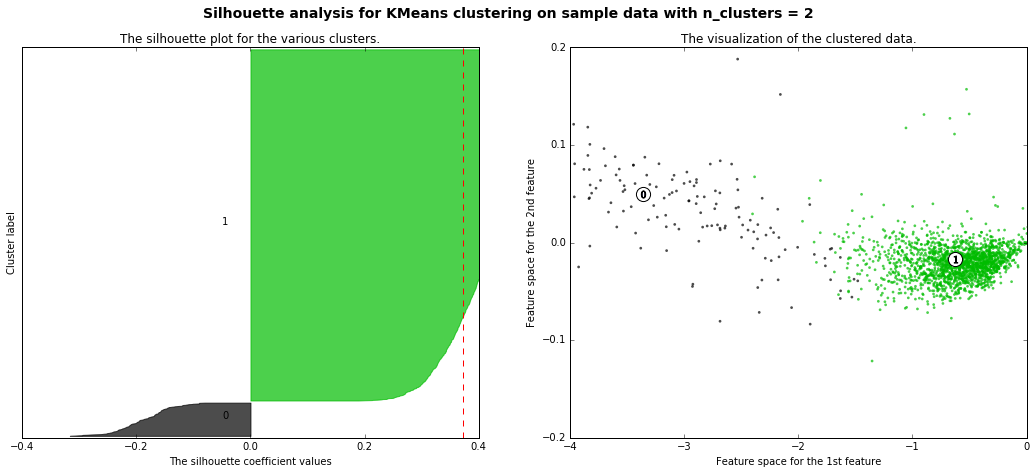

For n_clusters = 3 The average silhouette_score is : 0.0461944787365


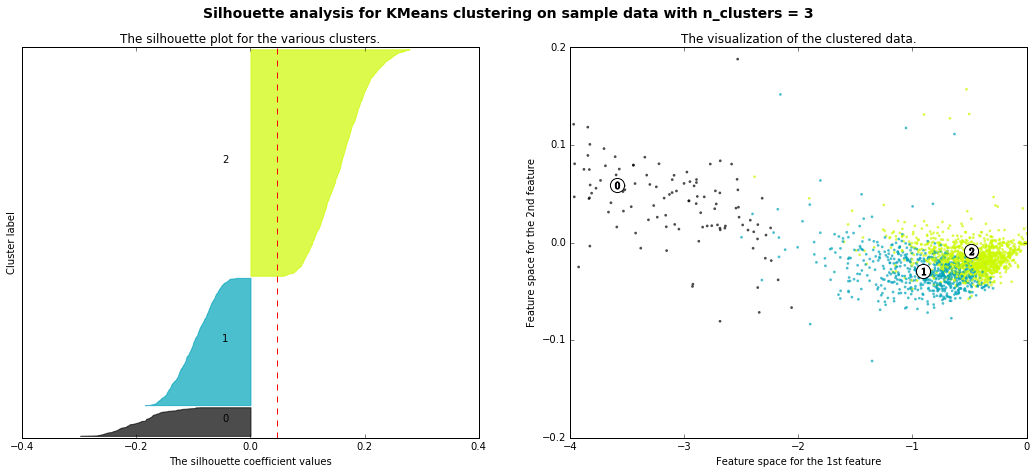

For n_clusters = 4 The average silhouette_score is : 0.0477454246333


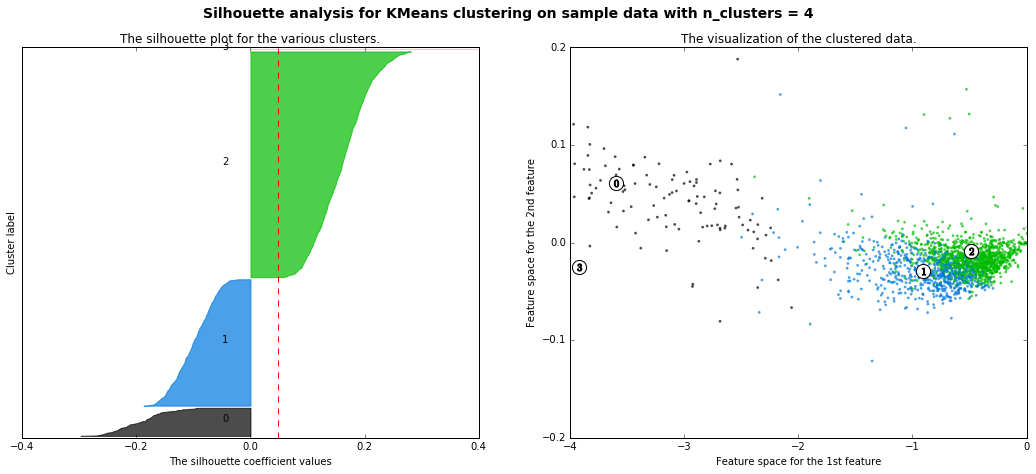

For n_clusters = 5 The average silhouette_score is : 0.0338174956834


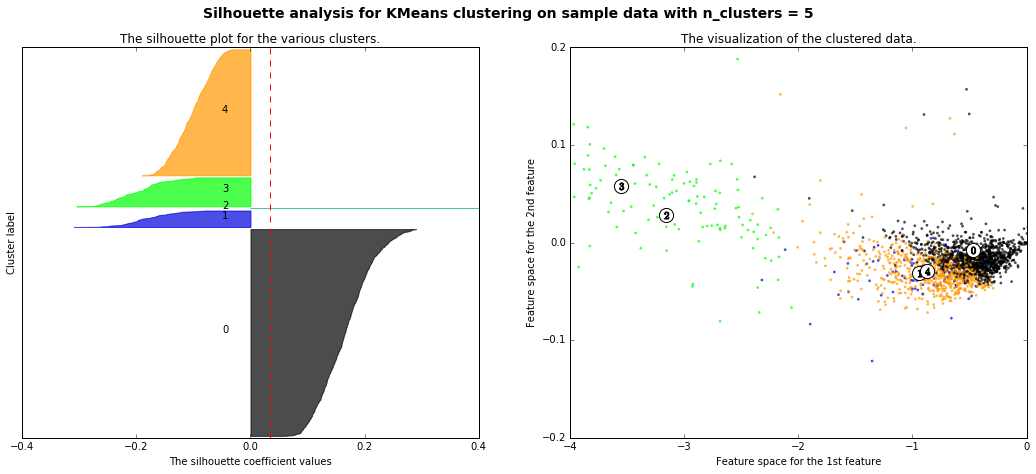

For n_clusters = 6 The average silhouette_score is : 0.0675990332626


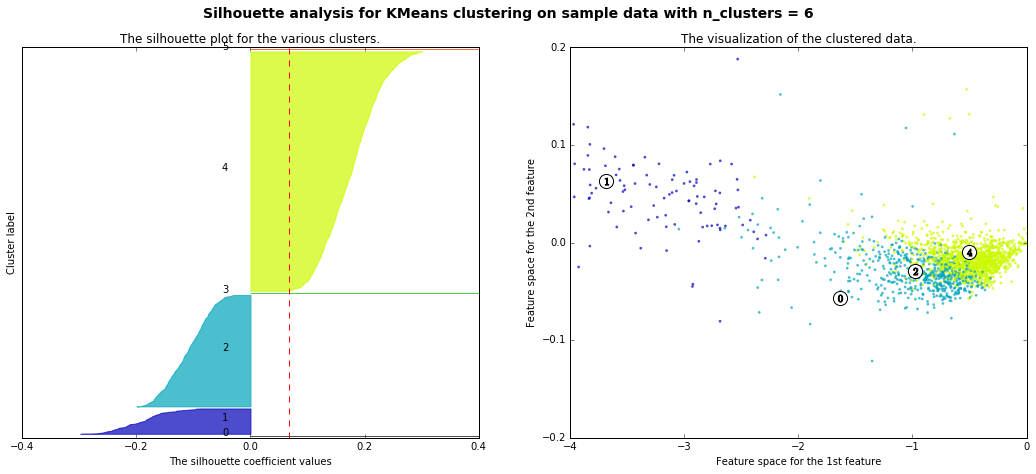

For n_clusters = 7 The average silhouette_score is : 0.034847862317


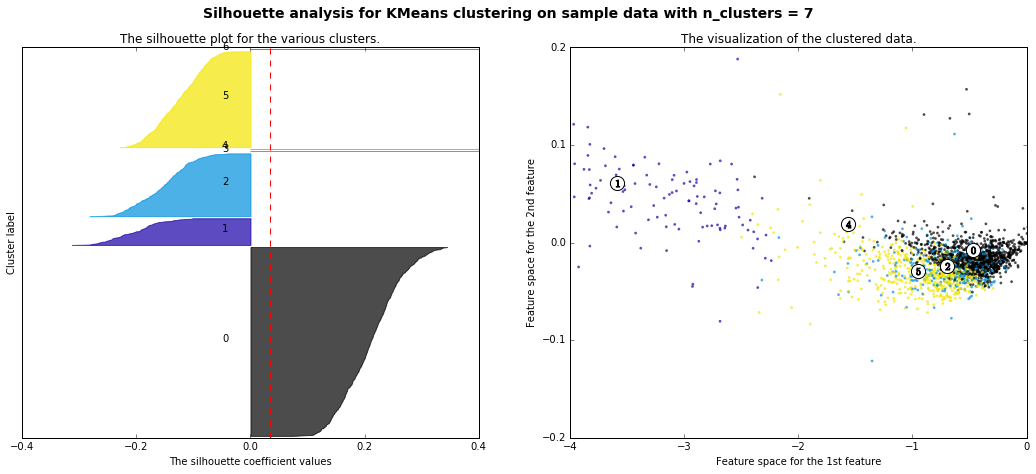

For n_clusters = 8 The average silhouette_score is : 0.0298032146691


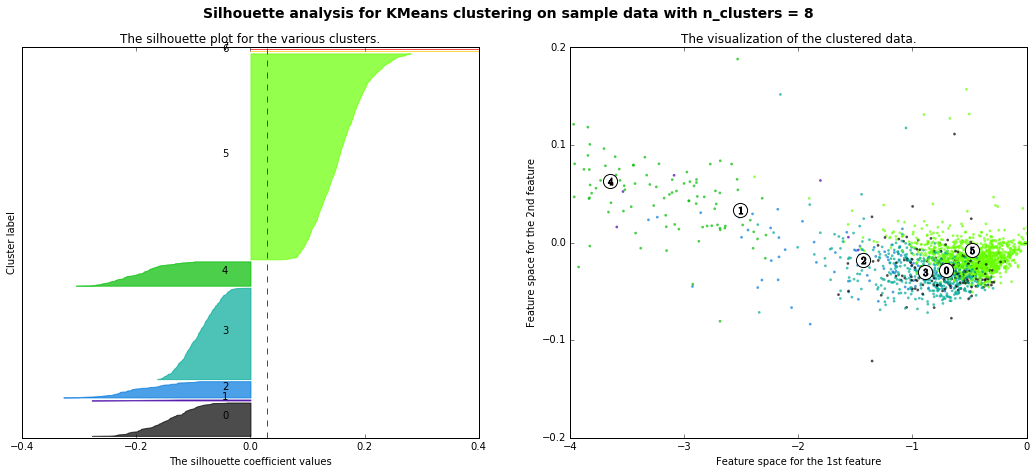

In [34]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 0.1]
    ax1.set_xlim([-0.4,0.4])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.set_ylim([-0.2, 0.2])
    ax2.set_xlim([-4, 0])
    ax2.set_xticks([ -4,-3,-2,-1,0])
    ax2.set_yticks([ -0.2,-0.1,0,0.1,0.2])

    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()